# First Deep Learning Project in Python with Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

The steps we are going to cover:
1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Put It All Together.
7. Make Predictions

## Load Data
    

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [2]:
import pandas as pd
df = pd.read_csv('../data/housepricedata.csv')

In [61]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
df.nunique()

LotArea             1073
OverallQual           10
OverallCond            9
TotalBsmtSF          721
FullBath               4
HalfBath               3
BedroomAbvGr           8
TotRmsAbvGrd          12
Fireplaces             4
GarageArea           441
AboveMedianPrice       2
dtype: int64

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [ ]:
# Your answer here : classif

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [4]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [5]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [65]:
# splitting into train and test
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [67]:
len(X_train)

1241

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [68]:
# splitting into validation and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42)

219

In [72]:
df.columns


Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [73]:
X_train = pd.DataFrame(X_train)

In [74]:
X_train.columns = X_train.columns.astype(str)
X_train = X_train.rename(columns={"0": 'LotArea', "1": 'OverallQual', "2": 'OverallCond', "3": 'TotalBsmtSF',
                                  "4": 'FullBath', "5": 'HalfBath', "6": 'BedroomAbvGr', "7": 'TotRmsAbvGrd',
                                  "8": 'Fireplaces', "9": 'GarageArea'})


In [75]:
X_train.describe

<bound method NDFrame.describe of       LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        7800            5            7          793         1         0   
1        6040            4            5            0         2         0   
2       10357            7            5          910         2         0   
3        1869            6            6          483         1         1   
4        7642            7            8          912         1         1   
...       ...          ...          ...          ...       ...       ...   
1017     9135            6            5         1682         2         0   
1018     9247            6            6          858         1         1   
1019     8658            6            5         1088         2         0   
1020    11616            5            5         1092         1         0   
1021    10530            6            5          975         1         0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageA

Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [76]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="mean")),
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant")),
     ('encoder', OrdinalEncoder())])

num_attribs = ['LotArea', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea'] #put column names in here of num attribs you wish to include
cat_attribs = ['OverallQual', 'OverallCond']

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", cat_pipeline, cat_attribs),
 ])


In [77]:
X_train = pd.DataFrame(full_pipeline.fit_transform(X_train), columns=num_attribs+cat_attribs)

## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
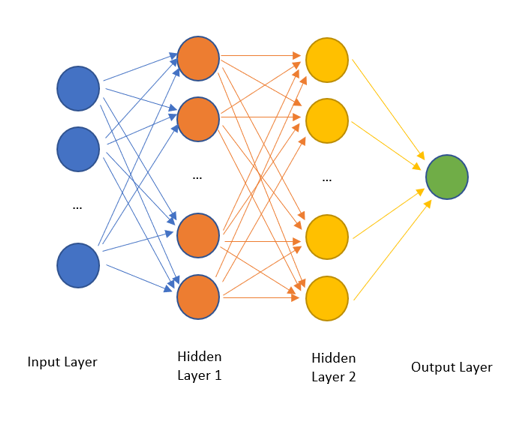
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [78]:
X_test= pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9
0,8414,6,8,1059,1,0,3,6,0,264
1,12256,8,5,1463,2,1,3,9,2,712
2,8960,5,6,1008,1,0,2,5,1,360
3,5000,6,7,1004,2,0,3,7,2,420
4,12898,9,5,1620,2,0,2,6,1,912
...,...,...,...,...,...,...,...,...,...,...
214,39104,7,7,1385,1,0,2,5,2,439
215,9000,8,5,1566,2,0,3,7,0,750
216,3922,7,5,1258,0,2,2,7,1,648
217,8163,5,6,1144,1,0,3,6,1,796


In [79]:
# Dependencies
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
input_dim = X_train.shape[1]
model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=(input_dim,)),  # Hidden layer 1
    layers.Dense(16, activation='relu'),  # Hidden layer 2
    layers.Dense(1, activation='sigmoid')  # Output layer
])




10

Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [80]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                132       
                                                                 
 dense_7 (Dense)             (None, 16)                208       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [82]:
# train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 0s 880us/step - loss: 0.2392 - accuracy: 0.6311
Epoch 2/100
32/32 [==============================] - 0s 941us/step - loss: 0.1927 - accuracy: 0.7710
Epoch 3/100
32/32 [==============================] - 0s 977us/step - loss: 0.1630 - accuracy: 0.8102
Epoch 4/100
32/32 [==============================] - 0s 930us/step - loss: 0.1469 - accuracy: 0.8366
Epoch 5/100
32/32 [==============================] - 0s 890us/step - loss: 0.1372 - accuracy: 0.8376
Epoch 6/100
32/32 [==============================] - 0s 902us/step - loss: 0.1300 - accuracy: 0.8405
Epoch 7/100
32/32 [==============================] - 0s 927us/step - loss: 0.1245 - accuracy: 0.8454
Epoch 8/100
32/32 [==============================] - 0s 876us/step - loss: 0.1202 - accuracy: 0.8425
Epoch 9/100
32/32 [==============================] - 0s 929us/step - loss: 0.1165 - accuracy: 0.8434
Epoch 10/100
32/32 [==============================] - 0s 893us/step - loss: 0.1135 - accura

In [83]:
X_val = pd.DataFrame(X_val)

In [84]:
X_val.columns = X_val.columns.astype(str)
X_val = X_val.rename(columns={"0": 'LotArea', "1": 'OverallQual', "2": 'OverallCond', "3": 'TotalBsmtSF',
                                  "4": 'FullBath', "5": 'HalfBath', "6": 'BedroomAbvGr', "7": 'TotRmsAbvGrd',
                                  "8": 'Fireplaces', "9": 'GarageArea'})

In [85]:
X_val = pd.DataFrame(full_pipeline.fit_transform(X_val), columns=num_attribs+cat_attribs)

In [86]:
X_val

,LotArea,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OverallQual,OverallCond
0,0.239285,1.028919,0.672556,-0.773654,0.202503,0.196286,0.567881,0.655274,4.0,2.0
1,0.174333,-0.647010,0.672556,1.292568,0.202503,0.196286,3.564649,-0.057942,4.0,3.0
2,0.064209,-0.559035,0.672556,1.292568,0.202503,0.777186,0.567881,0.179797,4.0,3.0
3,-0.042507,0.333915,0.672556,-0.773654,0.202503,-0.965514,0.567881,-0.890027,2.0,2.0
4,-0.157108,-0.356692,0.672556,1.292568,0.202503,0.196286,0.567881,0.724614,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...
214,-0.056740,-0.233526,0.672556,1.292568,1.506860,0.777186,-0.930503,0.595839,4.0,2.0
215,-0.491556,0.712208,0.672556,-0.773654,-2.406212,0.196286,0.567881,0.803860,4.0,2.0
216,0.014426,-0.572231,0.672556,1.292568,0.202503,0.777186,0.567881,-0.419503,3.0,2.0
217,0.051847,-1.104482,-1.102019,1.292568,-1.101854,-0.384614,-0.930503,-0.563136,1.0,4.0


In [87]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [88]:
from sklearn.metrics import accuracy_score
from math import sqrt

y_pred = model.predict(X_val)
y_pred = np.round(y_pred)
y_val = y_val.ravel()
y_pred = y_pred.ravel()
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy: ", accuracy)


7/7 [==============================] - 0s 759us/step
Accuracy:  0.8858447488584474


In [ ]:
# calculate accuracy on validation set


We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [101]:
input_dim = X_train.shape[1]
model2 = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=(input_dim,)),  # Hidden layer 1
    layers.Dense(16, activation='relu'),  # Hidden layer 2
    layers.Dense(1, activation='sigmoid')  # Output layer
])

In [102]:
model2.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [103]:
# train model
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.2378 - accuracy: 0.5333 - val_loss: 0.2257 - val_accuracy: 0.6986
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.5656 - val_loss: 0.2186 - val_accuracy: 0.7260
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.6301 - val_loss: 0.2114 - val_accuracy: 0.7763
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.7045 - val_loss: 0.2027 - val_accuracy: 0.7900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.7622 - val_loss: 0.1936 - val_accuracy: 0.7991
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.7955 - val_loss: 0.1839 - val_accuracy: 0.7900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.8053 - val_loss: 0.1752 - val_accuracy: 0.8037
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.8669 - val_loss: 0.1003 - val_accuracy: 0.8630
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.8679 - val_loss: 0.0999 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.8679 - val_loss: 0.1004 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.8679 - val_loss: 0.1002 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.8669 - val_loss: 0.1000 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.8659 - val_loss: 0.0990 - val_accuracy: 0.8630
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.8708 - val_loss: 0.0993 - val_accuracy: 0.8630
Epoch 

In [104]:
X_test = pd.DataFrame(X_test)
X_test.columns = X_test.columns.astype(str)
X_test = X_test.rename(columns={"0": 'LotArea', "1": 'OverallQual', "2": 'OverallCond', "3": 'TotalBsmtSF',
                                  "4": 'FullBath', "5": 'HalfBath', "6": 'BedroomAbvGr', "7": 'TotRmsAbvGrd',
                                  "8": 'Fireplaces', "9": 'GarageArea'})
X_test = pd.DataFrame(full_pipeline.fit_transform(X_test), columns=num_attribs+cat_attribs)

In [98]:
X_test

,LotArea,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OverallQual,OverallCond
0,-0.239472,-0.003115,-0.871480,-0.756207,0.247693,-0.220884,-0.913247,-0.831622,4.0,6.0
1,0.364787,0.918549,0.863558,1.147349,0.247693,1.548881,2.049732,1.066442,6.0,3.0
2,-0.153599,-0.119463,-0.871480,-0.756207,-0.882405,-0.810805,0.568242,-0.424894,3.0,4.0
3,-0.776417,-0.128589,0.863558,-0.756207,0.247693,0.369038,2.049732,-0.170689,4.0,5.0
4,0.465759,1.276720,0.863558,-0.756207,-0.882405,-0.220884,0.568242,1.913792,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...
214,4.587370,0.740604,-0.871480,-0.756207,-0.882405,-0.810805,2.049732,-0.090191,5.0,5.0
215,-0.147308,1.153527,0.863558,-0.756207,0.247693,0.369038,-0.913247,1.227438,6.0,3.0
216,-0.945962,0.450873,-2.606518,3.050905,-0.882405,0.369038,0.568242,0.795290,5.0,3.0
217,-0.278949,0.190800,-0.871480,-0.756207,0.247693,-0.220884,0.568242,1.422329,3.0,4.0


In [107]:
# predict on TEST set
y_pred = model2.predict(X_test)
y_pred = np.round(y_pred)
y_test = y_test.ravel()
y_pred = y_pred.ravel()


# calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

7/7 [==============================] - 0s 988us/step
Accuracy:  0.8767123287671232


In [111]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
print(validation_loss)
print(training_loss)

[0.22573497891426086, 0.2185531109571457, 0.2113700658082962, 0.20274025201797485, 0.19363458454608917, 0.1838657259941101, 0.17521151900291443, 0.16793493926525116, 0.1618683636188507, 0.15556716918945312, 0.15027116239070892, 0.14569908380508423, 0.1421879678964615, 0.13831692934036255, 0.135309100151062, 0.13281942903995514, 0.12977883219718933, 0.1273849904537201, 0.1252547800540924, 0.12374139577150345, 0.12214424461126328, 0.12075543403625488, 0.11920217424631119, 0.11823258548974991, 0.11688880622386932, 0.11639147251844406, 0.1157139390707016, 0.11401662230491638, 0.11295650154352188, 0.11267632991075516, 0.11120425164699554, 0.11082181334495544, 0.11005398631095886, 0.11006546765565872, 0.10866017639636993, 0.10825049132108688, 0.10776294767856598, 0.1075776219367981, 0.10650817304849625, 0.10636530071496964, 0.10645066946744919, 0.10560840368270874, 0.10488981008529663, 0.10525771975517273, 0.1045629009604454, 0.10438291728496552, 0.10384541004896164, 0.10344617068767548, 0.1

Visualize training and validation losses and accuracies plots with the help of keras

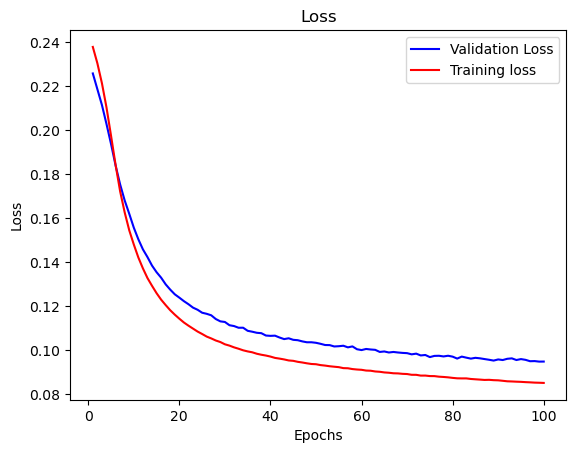

In [115]:
import matplotlib.pyplot as plt

training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.plot(epochs, training_loss, 'r', label='Training loss')
plt.title( 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

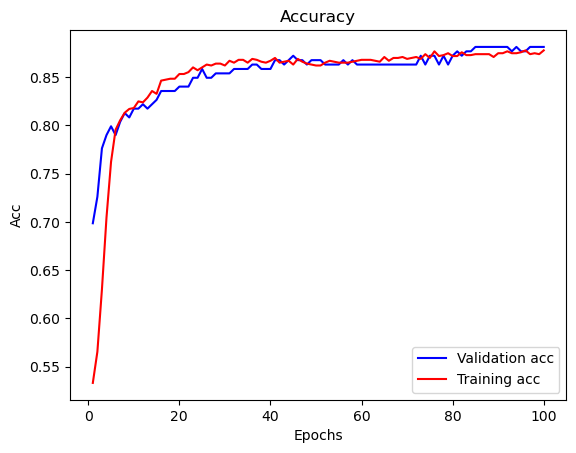

In [118]:
import matplotlib.pyplot as plt

training_acc = history2.history['accuracy']
validation_acc = history2.history['val_accuracy']

epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.plot(epochs, training_acc, 'r', label='Training acc')
plt.title( 'Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/